## HasKAL Programming Interface

In [2]:
:ext QuasiQuotes

In [3]:
import qualified H.Prelude as H
H.initialize H.defaultConfig

In [4]:
let fname = "/data/ligo/er8/gw150914/H-H1_LOSC_4_V1-1126259446-32.gwf"
let chname = "H1:LOSC-STRAIN"

In [5]:
import HasKAL.FrameUtils.Function (readFrameWaveData')
import HasKAL.DetectorUtils.Detector(Detector(..))

In [6]:
maybewave <- readFrameWaveData' General chname fname

In [7]:
import Data.Maybe (fromJust)
let x = fromJust maybewave

In [8]:
import HasKAL.WaveUtils.Data(WaveData(..))
import qualified Data.Vector.Storable as V
let y = V.toList $ gwdata x
print $ take 5 y

[2.263866304639571e-19,2.4506253852248475e-19,2.607349243822363e-19,2.395651992756503e-19,2.358857603350546e-19]

In [9]:
import HasKAL.TimeUtils.Signature
import HasKAL.TimeUtils.Function
import HasKAL.WaveUtils.Signature

let ylen = length y
    t0 = deformatGPS $ startGPSTime x
    fs = samplingFrequency x
    dat = zip [t0,t0+1/fs..] y
    tv = take (length y) [0,1/fs..] :: [Double]

In [10]:
[r| require("ggplot2") |]
[r| require("scales") |]

0x00007f59380033c8

0x00007f59380033c8

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nOydZ4AURfrwn+6etDu7yy67C5IRUVgJIqCuEpWM6CmIWc94mFDxr69yh4JZT850KnCicIJi9hQzKiKKkoNkyWklLCxsnNDd74earq2uDlM9eaF+n7p7qqtrZrqfrnqioKoqcDgcDifzENM9AA6Hw+GYwwU0h8PhZChcQHM4HE6GwgU0h8PhZChcQHOOQ5YvX37zzTe3a9fO7XZ7vd727dtfd9118+bNM5rE/+///k/QWLRoEfnRfffdhz9avHix1VkLFy5M+vfhnKhwAc05rgiHw+PGjevZs+ebb765ffv2cDgcDAa3bt06e/bswYMHDxky5MCBA2T7wYMH4+3ly5eTHy1btgxvL126lPxoxYoVaCMnJ6e0tNQ4jD179vTs2bNnz57Gjx577DHBgqlTp5Itd+7cecsttzRv3lySpGbNmt10003bt283drhgwYJhw4bl5eW5XK6OHTs+8sgjx44ds/p97MeGURRl9OjRPTVsWnKSi8rhHC8oinLdddfZ3/Cnn3760aNH8SnV1dVerxd9dP311+Pjsizn5OTgs6677jryKo0aNULHR4wYYTqMv/71r1bP1xVXXGE1tilTpuBmy5Yty8/Ppxrk5eX99ttvZG9Tpkwx9tO+ffudO3da/UQ2Y8O89tprXEpkAvyn5xw/zJgxA8uU/v37f/7557t37962bdvs2bNLSkrwR3fccQd51sCBA9HxTp064YMbNmwgJVTHjh3xR1u3bsXHX3rpJbIrRVHWrVs3evRoG9HWpUuXqAK6tra2bdu26GDjxo3PP//8goICtNuyZcvq6mrUbO3atZIkoePNmjU777zzPB4P2u3Ro0coFHI6NsTevXvz8vK4gM4E+E/POU6oq6tr1qwZEii33HKLLMvkp1VVVeeeey761OPxlJeX44/++c9/ouOiKFZWVqKDs2bNQgexBqOiogJ99OGHH2LJtX79enTwyJEjZ555ZpMmTSiZSw0yFAohGXrXXXfZfJe33noLnd6lS5cjR46oqnr48OHOnTujgzNnzkTNbrnlFnRk6NChdXV1qqpu2rSpqKgIHXz77bcdjQ1z2WWXAcAZZ5zBBXTa4T895zjhgw8+QNKkTZs2tbW1xgZYcQwAH374IT6+evVqfHzhwoXo4L333gsAgiDgWfl3332HPvr73/+OjrRo0UJRFHTw4MGDYAY1hk2bNqHjpDbDyNVXX42avfXWW/ggltpXX301OnLyySejI0uXLsXNHn30UXQQq18Yx4aYO3cuAIiiSKrdbYbKSSou03+Ow2lwfPHFF2hjzJgxPp/P2ODMM89cvHixoigA0KZNG3y8S5cuTZs23b9/PwAsX768d+/eoBkMO3ToMGDAANRs6dKlaHvlypXoyKBBgwRBQNt+v//f//437nPs2LGmg1y/fj3aKCwsHDdu3IIFCxRF6dGjx7333kuqPtasWYM2unXrRo4fbaxduxZt7Nq1C38F3Kx79+5o49dff3U0NgCoqqq68847AQAZWq2acVJHut8QHE5i6NSpE7qllyxZ4vRcbFq89tprVVUNh8N+vx/tKorStGlTALj00ktRY7QLhA7BiNXz9eSTT6LjWVlZ5GPocrneeecd3AxrnA8dOoQPHjp0CB0sLCxER1yuyASrqqoKNyM1MFgtwzI2VVXvu+8+ADj55JNRh1xKpB3uZsc5TsDTyVNPPdXpudjZDk2cN2/eXF1dDQA9e/YUBOGss84CgCVLlgBAWVkZmmsDAJ5cs4Nn0LW1teTxcDh84403YvMj9pMjjXW5ubnUp61bt0YbpAf3119/jbfLy8vZx7ZixYoXX3wRAP7zn/+g9xMn7XABzTlOqKqqQhuUB8L9999v9DiePHky2WbQoEFoY+PGjZWVldghGi3zkYDeu3dvWVkZVmR369YNT6XZwQJ61KhRO3furKur+/LLL1E/gUAAyUcAkGUZbeA5MrkdCoXQRv/+/dHGfffd98cff1RWVr700ktvvPEGPgW3jIosy3/7298URbnhhhuwWwsn7XAdNOc4wePxBAIBAKiqqqJkdFSaNm3arVu3VatWqaq6cuVKFKIiiiJS+5599tmo2ZIlS37//Xe0jWW6I15//XUkNLt27ZqdnQ0Aw4YNe+WVV5D327x581AzSZKQjA6Hw263Gx3E0hZL6jvvvHPGjBmqqq5du/a0004zXg5dgoVXXnll+fLlxcXF1KuLk174DJpznIDtflRYdnFxcQcNHGBihNRyoBl0p06dkIDD5rKlS5fiGXRsArpHjx6lpaWlpaWk6MSXxoGCeJyVlZW4GdZs4E+7d++OldqYSy65BG0IgmB0rbMCOasEAoFevXp11MCfduzY0Sa+hpM8uIDmHCf06dMHbbz44osqYeB68MEHN2rgubARLCWXLFmC/DSwXC4qKkIObfgjr9eLnD0SAp4j42G3aNECbezduxc327NnD/UpAIwfP37u3LnDhw8vKSkZOHDge++9d+2116KP2rVrh4MkGTl27NgmAnx806ZNO3fudPatOImAC2jOcQL2xPjyyy+fffZZ1ZAX6a233sI6BCO9evVCnhVz587FFkL8KVJDL1q0aMeOHQDQp08fyg2DhY8++qh9+/bt27fv3LlzOBzGx3/++We00a5dO7SB3ebI1QB2TO7atSvaqKioqKio6N279+eff75+/fp58+Zdfvnl3377LfoUv7E4DZh0upBwOIlDURQy89Hw4cNRqPfu3bu/+OKLUaNGkbf9c889Z+xh2LBhZJvFixfjjyjNLHoB2GD6fJHZlyZMmBAMBlVVXb9+PXY7ue+++1DLmTNnoiNt2rTZsmWLqqp//PEH9tmYPXs2aob9Oj777DNFURRF+eCDD/B8/KuvvmIfW5wtOUmC//Sc44e9e/e2atXKZjoyfPhwGwH9wgsv4JYul4sMR1ywYAHZz4oVK+xHYiraFEU577zz8Ed+vx/HpgNAXl7enj17UMvq6uqWLVui46IoNm/eHEfEkHGSOOAQAIqKisjkSqWlpVSwu/3Y4mzJSRL8p+ccV2zfvr1Hjx6m0vnCCy+sra1FFjZTAb1u3Trc+MwzzyQ/qqysFEURi0Ir2YexEm07d+40ddPOyclB6aoxv/76q9EXJS8vjwzDKSsrM+2tXbt2O3bscDq2eFpykgT/6TnHG6FQaPbs2UOGDGncuDGSfb179545cyaSqn369PF6vc8//7zxREVRsP3t1ltvpT7FuYquvPLKqGOwEW2VlZVPP/109+7dfT6fKIpt2rS5/fbbt2/fbmy5bdu2G2+8sWnTpoIgFBcXX3/99Vu3bqXaVFRU/OMf/+jQoYMkSW63u1OnThMnTiTzqToaW8wtOUlCUA22lIYFXvqZ8vrrr+OMXxwOh9OwSKkXx/bt2++8885TTz3V4/H4fL4uXbpMmDDBJhp13rx5poUncMBVopg/f74gCKTjJwCEQqF//etfnTt3drvdeXl5w4cPx9lnOBwOJwWkLpLwl19+GTp0KI7HBYC1a9euXbt25syZCxcuxIkTSTZu3MjYeWFh4V133WU8jjN72bBhwwbjLFuW5UsvvRQnSKusrPzqq6++/fbb999/f+TIkYyj4nA4nHhInYC+6667kHS++uqrL7/88mAwOHXq1B9++GHv3r3jx49/9913jaegqhb9+vXDOQcQxipwRUVFkyZNcjSepUuXzpkzZ82aNfPnz0cpKElmzZqFpHP79u0nTZpUVVU1ceLE/fv333TTTf3790fKTQ6Hw0kqqRPQyETerFmz2bNnI8Xx4MGDkWMQziBDgWbQ11133c0335zw8Sxfvpx0q6J477330MZbb72FKnE0bdr00ksvPXr06Pvvv3/bbbehT2tqasiIAxt8Ph8uR8ThcDgspE5A9+/ff968eWVlZW+88cZVV10V
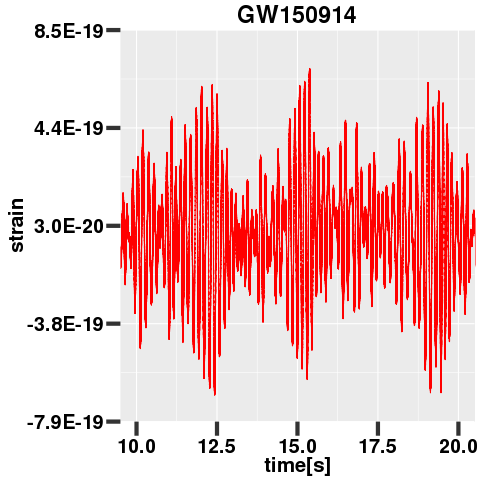

In [11]:
[rgraph|
  Xv <- tv_hs
  Yv <- y_hs
  z <- data.frame (Xv,Yv)
  p <- ggplot(z, aes(x = Xv, y = Yv)) + geom_line(color="red")
  plabs <- p + labs(title = "GW150914", x = "time[s]", y = "strain")
  black.bold.text <- element_text(size=20,face = "bold", color = "black")
  pfin1 <- plabs + theme(title = black.bold.text
                       , axis.title = black.bold.text
                       , axis.text = black.bold.text
                       , axis.ticks.length = unit(.5, "cm")
                       , axis.ticks = element_line(size = 2))
  pfin2 <- pfin1 + coord_cartesian(xlim = c(10,20), ylim = NULL)
  yformatter <- function (x) {
    ind <-floor(log10(x))
    sprintf('%3.1E',x)
   }
  pfin <- pfin2 + scale_y_continuous(label=yformatter)
  |]

In [11]:
[r|ggsave(file = "gw150914.png", plot = pfin, dpi = 100, width = 6.4, height = 4.8)|]

0x00007f1dbc002f88

In [12]:
import HasKAL.SpectrumUtils.Signature
import HasKAL.SpectrumUtils.SpectrumUtils (gwpsdV,gwOnesidedPSDWaveData,gwspectrogramWaveData)
import HasKAL.SignalProcessingUtils.LinearPrediction (lpefCoeffV,whiteningWaveData')
import qualified Data.Vector.Storable as V
import qualified Numeric.LinearAlgebra as NL

In [13]:
let p = 1500
    nfft = floor fs
    spec = gwpsdV (gwdata x) nfft fs
    lpefc = lpefCoeffV p spec
    whnx = whiteningWaveData' lpefc x

In [14]:
let whnspe = gwOnesidedPSDWaveData 0.2 whnx
    freV = V.toList . fst $ whnspe
    speV = V.toList . snd $ whnspe
return $ take 5 speV

[2.332388429956866e-4,3.4782874496679746e-4,4.1305078018506275e-4,5.553892242294359e-4,6.749673053864642e-4]

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nOydeXxU5bn4n/csM2e27MskwRIghMUFsWK14lbvtfVXr1LtxRtXLlj19lZ73Wp7W1q1Ltx6tXLVoihSRBT0qrR6bWu9rQtY/cmPSoNEARUMkBCSzGTWZDLnvL8/3uQwmfVssyR5vn/wCWfe5ZkzJ888ed5nIZRSQBAEQUoPrtgCIAiCIOlBBY0gCFKioIJGEAQpUVBBIwiClCiooJG8s3Xr1ra2tsbGRp7nPR7Paaed9tBDD0WjUXXAsmXLCCGEkOeff169uHTpUnZxzZo16sVbbrmFXVy1alXiFoqiPPLIIw899FAB3k4mtMjwxhtvPPTQQw899NC6det0Lc7e9ezZs83JiIw3KILkDVmWb7755rQP3uzZs/fv38+Gbdy4kV38wQ9+oM49/vjj2cVrr71WvXj22Wezi3v37k3caMOGDWmfZ1mWnU5n6u6//OUv2QBFUTZt2nT66ac7HA5RFE844YSHHnpoeHhYXSEajd51112tra08z1dVVV1xxRWq2ElkkkGlu7u7rKyMjZk1a5amOziK3lknn3xyeXl5eXm5rl2QUgMVNJJHfvrTnzLNIgjC4sWLf/7zn998881f+tKX2MWTTz45Ho9TSnt7ewkhAPC1r32NTQyHwxw38ufdiSeeyC4qilJeXg4A06dPZ//1+/3bt2+//fbbRVFMqxw//fTTtF8PqoK+7bbbUl+96KKLZFmmlMZiMfUrQaW+vv7zzz9XRcopg8o///M/q4vkW0HPmjUruzDIuAA/PyRf7N69m+d5APB4PO+//756PRwO/93f/R1TH6+++iq7eMoppwBAeXk504xbt24FgNbWVkEQeJ4Ph8OU0r1797JZ1113HaU0GAym6tYkGX77298CwPHHH79qLDt27KCUbtu2jc2aMWPG7373uzfffPO0005jV5599llK6a9+9Sv239NOO+3NN998+umnPR4PAFx44YVsfS0yMN577z0AOPPMM/OtoIeGhjo6Opqbm9mUjo6O3t5eXXshpQMqaCRf3HLLLUxHPPDAA0kvdXR0fOUrX/nKV77y8MMPsyvLly9ng3fv3k0pXblyJQAsXbr0y1/+MgBs2bKFUqp6qF988UVKaSQSOXcUh8ORVjned999AHDbbbdFo9Hdu3f39fUlvqqaz5s3b2ZXPv74Y3aFqeBzzz2X/Xfnzp1swF133QUAHMcxradFBkqpLMsLFiwQBGHnzp05Va2iKM8999yCBQtEUXS73RdddJH6d4A6669//etVV101ffp0u91OCKmqqjr33HOff/55SumePXuSvjDuu+++7FOQkgUVNJIv5s2bxxRET09PzsFbtmxJNF2vvPJKAFi1atW//Mu/AMCDDz5IKf3hD3/IlKPP50uanukv+iuuuAIAzj77bGb5AsDpp5++fft29urf//3fs4tffPEFu6IoisvlAoCpU6dSSufMmcMGqF7pl156iV35wx/+oFEGSukTTzwBALfeeivVYAuzt5lIU1NT4qw///nPqjsliVWrVqVV0Nmn5Px0kGKBChrJF+x0zuv1Jl7cs2dPRwKHDh1i14eHh5l/+eabb6ajmnHbtm1r164FgH/6p3+ilJ533nkAcOqpp6bulUk5nnjiiakqye12d3R0UEpPOOEEdmVwcFCdMnXqVACQJIlSevrpp7MB6pnk3Xffza6sXbtWowz9/f01NTVNTU2BQIDmUtDvvPMOGyBJ0t133/373//+7rvvliQpcdbXv/519t9//Md/3Lp16/bt29kfHACwYMGCtMJomYKUIKigkXzBzv1aWloSL6rGIGPZsmXqSxdffDEAnHnmmYFAgBBis9mGhoaYT2D69OmKotTU1ADAT3/609S90ipHWZa9Xm95efnll19+5MiR3t7ea665hg1bvHhxplkzZ85UL955553s52984xvbtm1bv369aok/9thjWmSglN5www0A8MILL7D/ZlfQ7E8HAHjiiSfUi6tXr06c9fLLL69du3bt2rVHjhyhlEajUdWuV5dNEkbLFKQEQQWN5AumT51OZywWUy9mUdCPPfYYM2///Oc/q5ZdPB53u90AsH37djaF+aOT0Bi0EI1GmQejurqaJkTyJVrQLMjEbrdTSn0+37Rp0xIFVo3ZDRs2aJFh586dHMedeOKJu3btYn80sDHNzc0dHR3s8DMR1agfGBhQL/p8viRlumPHjptvvvmss85qaGhIFC+TgtYyBSlBMFEFyRennnoqAEQikf/+7/9WLx44cIBSKsvyMccckzSe/RkeCoWee+45AFiwYAEA8Dx/8sknA8Djjz8OAGVlZSzewxiSJNXV1QGA3+8HAFVV9fT0sB8URWE/e71eAKioqHjnnXcuu+yy8vJyURTPPffc+++/n41MUtyZaG9vVxTlww8/nDt37pw5c1Sn9r59++bMmaN+66TC/v5gqBGHjBdffHH+/PkPPvjgnj17/uEf/uHBBx98/fXXs4thYApSCqCCRvLFsmXL2A833HDDhx9+qF5XFOUnP/lJZ2dn0vjm5ubW1lYAYBkfTEEDANPI7OI555yT6bArleeff/6444477rjjWIgbABw8ePCLL74AgOnTpwOAeoz5l7/8hf3wt7/9bXBwEACY87qjo+PIkSO33Xabz+eLxWJvvPEGC6iQJCmtd9s8qlGf+K2W+DMA/Od//qeiKADw17/+9fHHH7/pppvUoLpMGJiClATFNuGRCYuiKN/85jfZYyaK4qWXXnrvvff+6Ec/OvbYY9kVGOvioKPuWkZ7ezu7mKieHn300bR7pXUvqN8Kxx577NNPP71u3TpV/d111100IQ66vr5+9erV69evV3Opn3vuOUrp1772Nfbff/u3f3vppZd+/OMfs8juK664QqMMqbAxmRwLqmHrcDjuvffeP/zhD/fee68awMdmsdBDAPj5z3++ffv2V155Zf78+UnLqm/ks88+Gxwc1DIFKUFQQSN5JBgMnn/++almwZe+9KVHHnkkVUG/+uqrbIDL5WJJhpRSZvMy9uzZk3ajTMrxO9/5TuruZ511VjQaZQPSZhJ+61vfYvkyb731ls1mS3rV6/WqYXlaZEgip1pcunRp0o5qtjqbtWLFiqQBqr+lubmZLaJ+NQLAfffdp2UKUoKggkbyiyzLmzZtOu+88yoqKgCgrq5u2bJlXV1d7LgsSUGHQiGmEM844wz1oqIo9fX1TJUoipJ2l0zKUZblRx99dN68eaIo2my2efPmPfDAA0NDQ4mLP/vss6eddpokSawWx8qVKxNrcfz1r3+95JJLqqurCSF1dXVLlixJq52zyJBETgUty/ITTzxx0kknCYLgcDjOPffcDz74IHGWLMsrVqxobm4mhEyZMuWWW27x+XyqT//ll1+mlH7yySdnnHGGzWYTRXHVqlVapiAlCKHY8gpBEKQkwUNCBEGQEgUVNIIgSImCChpBEKREQQWNIAhSoqCCRhAEKVFQQSMIgpQoQrEFsJj+/n4DgYMOhyOxh2nhpwOA4RUIIXa7nSUoG5teUVGhluMxgMm373Q6FUXJKb+WXTwez9DQUCwW07i1LsntdrsgCOFwWON4k9ulUlFREQgEWMa2Aex2+/DwsOHpkiRxHBeJRIxNTwvHcaIoDg0NWbimKIqSJKXtdKMRkx9TWVlZJBKJx+PGpldXVyf+d6IpaBbdrXcWIabiwc1PBwCTAelmpnMcV/pvX8sueu+kXsmL+5ywj8nMCianm5Q/rTxg+slPZQL8OqugiwNBEKREQQWNIAhSolisoNetW9fa2srzfGtr61NPPaV32NDQ0L//+78fc8wxgiBMnTr1Zz/7mepP3LBhA0lBbfGJIAgy8bDSB71p06YlS5YAwMyZM/fs2bNs2TJJki677DLtw2666aZVq1YRQqZPn/7ZZ5/dddddPT09
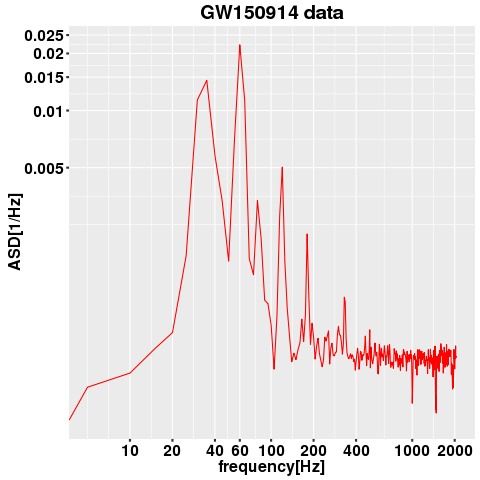

In [15]:
[rgraph|
  Xv <- freV_hs
  Yv <- speV_hs
  z <- data.frame (Xv,Yv)
  p <- ggplot(z, aes(x = Xv, y = Yv)) + geom_line(color="red")
  p <- p + labs(title = "GW150914 data", x = "frequency[Hz]", y = "ASD[1/Hz]")
  xbreaks <- c(10,20,40,60,100,200,400,1000,2000)
  ybreaks <- seq(0,0.025,0.005)
  p <- p + scale_x_log10(breaks=xbreaks,labels=xbreaks)
  p <- p + scale_y_log10(breaks=ybreaks,labels=ybreaks)
  black.bold.text <- element_text(size=16,face = "bold", color = "black")
  p <- p + theme( title = black.bold.text
                , axis.title = black.bold.text
                , axis.text = black.bold.text
                , axis.ticks.length = unit(.1, "cm")
                , axis.ticks = element_line(size = 1))

  |]


0x00007f1dbc003728

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAIAAADytinCAAAgAElEQVR4nOy9fYwlV302+IxtpmoM7P1NbLfLBnUfA2NXPlp9MMP4ShnRBX5Zt2ykqThRGBw50xas4N2Qd8aRUDYJ2vGIrAjSBvdolQSUjbhDNmacKKHmJSY9DgvVm4l9B1A4ncb2bQjJ6Q52V/tDOlc2PdXjGPaP59Tpa0gg2Bh6/NajtnXn3vo4n8/5fZ3f2fGd73wHLVq0aNFi++Gin3QBWrRo0aLFv4+WoFu0aNFim6Il6BYtWrTYpmgJukWLFi22KVqCbtGiRYttipagW7Ro0WKboiXoFi1atNimaAm6RYsWLbYpWoJu0aJFi22KlqBbtGjRYpuiJegWLVq02KZoCbpFixYttilagm7RokWLbYqWoFu0aNFim6Il6BYtWrTYpmgJukWLFi22KVqCbtGiRYttipagW7Ro0WKboiXoFi1atNimaAm6RYsWLbYpWoJu0aJFi22KlqBbtGjRYpuiJegWLVq02KZoCbpFixYttilagm7RokWLbYqWoFu0aNFim6Il6BYtWrTYpmgJukWLFi22KVqCbtGiRYttipagW7Ro0WKboiXoFi1atNimaAm6RYsWLbYpWoJu0aJFi22KlqBbtGjRYpuiJegWLVq02KZoCbpFixYttilagm7RokWLbYqWoFu0aNFim6Il6BYtWrTYpmgJukWLFi22KVqCbtGiRYttipagW7Ro0WKboiXoFi1atNimaAm6RYsWLbYpWoJu0aJFi22KlqBbtGjRYpvikp90AX44fPGLX/zzP//zpaWl9fX1zc3NKIquvPLKqampX/7lX967d+9PunQtWrRo8aPEju985zs/6TL8p/Cd73znN37jN+bm5v6jC44cOfLRj350x44dP85StWjRosVLhwuGoE+cODE7O/sDr/nVX/3VH0txWrRo0eIlxwVjg/6DP/gDADfccMP999//6KOPnjt37rnnntvY2FhZWfnMZz6Tpmm4pkWLFi1eHrhgJOg4jjc3N//5n//5mmuu+d5fv/CFL7ztbW+Loqiu6x9/2Vq0aNHipcAFI0FzIfmPTMyt6blFixYvP1wwBD01NQXgXe961+c+97nHHnvs/PnzAM6fP//YY4999rOf/bVf+7VwTYsWLVq8PHDBmDg++clPHjp06Ptf0zoJW7Ro8XLCBSNB33777YcPH/4+Fxw+fPj222//sZWnRYsWLV5qXDASNMGNKouLi48//vjm5ubOnTuTJOFGlTe/+c0/6dK1aNGixY8SF4wEPYqLLrpox44dO3bsCB9aJ2GLFi1efrhgJOiXbifh/Pz8008//eJK16JFix8NXve6173pTW/6SZdiu+CCIeiXbifhq+c+/O3Ob0zettTBEMCZ1f2T40urGO9gOERnHKtLmMQS0MH+8TNLmLwN99yD28axOkRniM5w2MHt6Pz3IYD9OHPf8BYA+ztn+LT7hrdMdpaWMOlfNsRtnXvuwy3DpU5ncrheX/Ff4s8P0elgeGZ1//j46urSODpAB5OdpfD2SSyxYL85/pHP4ual+yY7twwn4QsZKtLBsIPhGewfnulM7l/ivavD8f2dM0N0eAFvWVqdxBnsv+0MgFWMT2LpDPYDGMfq0nASq7ht8p4z2N/BcGk42ekMx7G6tDqJcezHmSVMjmM1vHEcq6zO/skzQ3RWMT68r4NxYBzjnVVfpPv2j9+yuro6zgZkdVgkfuhguHTfJDoY37+6inGsYnJ8aenM5P79Z4boLN03uf+WMyzPaC2Gww7O4LZb7rkHt+EMJvcvAWBnjU+u8jIAk1hawiQbcxyrZ4b72SCsxX3DW8Y7/vvJztLS6uRt4/fcs3rbLeP33bd6C8aBe4D92D9+5szqfgzRmRwOP9LBuwBgcnxpiA7bZBXjw9XO5PgS28Q3BTosxnDYwRBYBfYDS8AkcAbYz4EFduUSJjsYrg7HWZ5QfmIV4/txhpdNYmnpzCQ6wCQw9ION/eLHMPbzUfs7Z86s7gcwPr46RIdd05kc3oL77sFtk1jijSwAgNXhOIDJzlIYeEN0+OSl35ns/B/DcaxOYuke3BYGc5gpZ7AfS+hMDjmQxrF6Bvt9U6yOYxw4g/37z5zB/ltwH9+7dGZycv8SB8l9993CXn79m9/8j//4jz/sLH654oIxcbx0OwlffclP77zj3NlH9j4eXXZp9PTGFdHZB/deFz1cRVesfWpsPbr82uiRfXsf/J/3/M2l0dPnop3/b5TdED2wHl1eR6+4MnpsbGxt43R0Q/RAFG38RXTrxmPRxlj0eHTZX0S3PhH91LVjj+yKntkXPbixFm1E0djY2j9F11wZPTa2dy2KNr7d2XFp9PRmdMn56OKNPVEVXbGxN9q4ItoYi5ajNyTRo5dGT0fRxtei19//4I3X7nnkX6LxXdEzY7euXRk9dv+5G+PoW1dF31yPLt8VPbMZXfJ4dNnfRm+Loo2NG6Nd0TN/ce7WOPrWxlj0xehNZ8/t3RU9cz66OIke3Ywu2XhFNHbHGus7iPY8G10URRs3RA+c/aO9Y2NrY3vXnox2Dx7cc/bc3o2xaO2Pxtajyzf2RPuiB38mWoqijbN/s/dstHdX9Mz90Y1PRrtviB4Y27t2/9/ceDbae2X02Mbroo1LorGxtSq64my093x08c5bz1XRFfv2PHh19K/XRQ/f/8iN90c3LkdvOHtu709HX02iR5ejN2y8Ldo4EyXRoxtRtHFFtBldsvH66NLo6V3RMxvXR+eji/dFD14ZPXZl9FgVXbHxYLT24NjGzmjjoujL0Rv3RQ9uvCnaFT1zVfTNsWht4w1RHH1rOXrDddHDV0aPnY8uviF6YCxai6NvfS16/djY2vno4uXoDX8bve3Z6KKdY+fq6BVfi16/b+zBXdEzG38fPRnt3rfnwSein9q559y10SMbd0Qbfx89Hl22sSfat/fBc9HOsf99beeec2N71tajy9PooSej3Wcf2bsWjV2755Fd0TNfi17/T9E1T0Q/tRldMoj2bEaXXBk9du3YIxvfiq698ZGxaG3jmWgjijYui8aitbPn9m5Gl/xbtON8dHEUbVTRFRs7oyR69GvR678UXc9eOxvt/enoqzdED3wpun45esNYtHZV9M2dN57b2BuNRWtjY2v3n7vxiein0uih89HFfxu97evR69bOjcXRtzZ2Ro9Hl43tWdu358Fu9Pdr0djYrWsbl0RXRo89Ge3eGZ1bjt7wtej1a+fGzkcXD9b2VNEVGw9EG2PR2XN7/yK6NYke/VJ0/aXR09dFD69Hl2/8n9FaNLYcveHL0Rs31qJro0c2Ho7+Ldpx/9qNfxHdej66eCxa29gbrX1qbO3c2Nm/2ftE9FNXRo+djfYm0aM795wbi9bGbly7OvrXa6NH/jZ625ejN65Hl++78cGzn9r7eHTZs9FFG9dHj0eXXRs9Mj4+/oMn7f8wuGAImovqpz71qbe//e1XX311HMcXXXTRrl27xsfH3/GOd/zhH/4hgMXFxRfw5Gtf+zUA0LBQJTIlFgIHAYAcGkbDKNgSmcBpGIEDIHDWKT5BwTqIwOUooAADXgAgXA8FDeMgBtpA864MpYUyTpcu41s0jBYD52/cekjmPzsI/7QYAAZa4BSs/9UKH+IgcDDQ/KzEGugSmYFWsKJ8FRzEXwwA0EeMg1iniiKXzGkxGUp1xNeOb7dQELAp+Ap+jxwshmgn2rFNAJTIWAW+ghf4WwwAWCj+IEedwMFCiWX5C5sLnCjHRxloY7SCZXuKOOitfixd5vtIDJ/PMvP51irWnUVio/EnBatgS5NZKDVrWSML5YywfaBhnGbh2U2h03mlaAfn29NC8Qmh8X0/aj9UsqwUODjYOYUSFspClS6zRoVxZ0ulYGF9LXwVnAq9xqb2Vwv40vCNiDNOizi+0bcw4CBKW44f1sVCsblg4axAAAMl
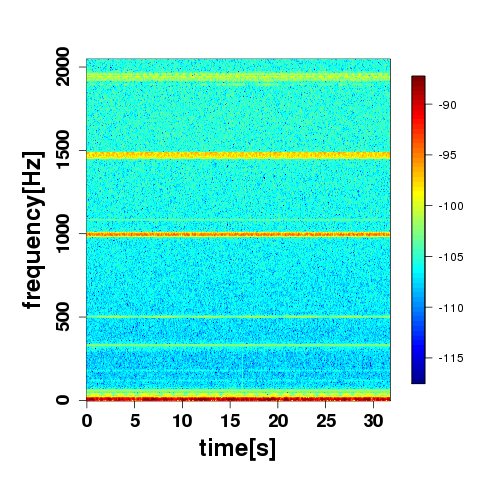

In [17]:
[r|require("fields") |]
let (sgt',sgf',sgp') = gwspectrogramWaveData 0.1 0.2 x
    sgt = V.toList sgt'
    lsgt = fromIntegral$ length sgt :: Double
    sgf = V.toList sgf'
    sgp = concatMap V.toList $ NL.toRows sgp'
[rgraph|
  l <- lsgt_hs
  tR <- sgt_hs
  fR <- sgf_hs
  sgpR <- sgp_hs
  pR <- matrix(sgpR,l)
  par(mar = c(5.5, 6.0, 4.1, 2))
  image.plot(tR,fR,log(pR),xlab="time[s]",ylab="frequency[Hz]",font.lab=2,font.axis=2,cex.lab=2,cex.axis = 1.5)
  |]